#NAMA : JACKIE LIM
#NIM : 2702271833

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
def set_seeds(seed=10):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seeds(10)

#READ DATA

In [3]:
df = pd.read_parquet('dataset_1B.parquet')
df

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
0,1/1/2015,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073
1,1/1/2015,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650
2,1/1/2015,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
3,1/1/2015,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
4,1/1/2015,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2016-03-10,Quarter2,Wednesday,10,2.90,NaN,960,0,0.0,0,0,8.0,62.833
1193,2016-03-10,Quarter2,Wednesday,8,3.90,NaN,960,0,0.0,0,0,8.0,62.562
1194,2016-03-10,Quarter2,Wednesday,7,3.90,NaN,960,0,0.0,0,0,8.0,62.562
1195,2016-03-10,Quarter2,Wednesday,9,2.90,NaN,1800,0,0.0,0,0,15.0,50.589


Handle inconsistent data on 'date' Column

In [4]:
df['date'][:500]

,date
0,1/1/2015
1,1/1/2015
2,1/1/2015
3,1/1/2015
4,1/1/2015
...,...
495,1/28/2015
496,2016-01-28
497,2016-01-28
498,1/29/2015


In [5]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

In [6]:
df['date'][:500]

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
495,2015-01-28
496,2016-01-28
497,2016-01-28
498,2015-01-29


Extract year, month, and days information from date columns

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['days'] = df['date'].dt.day

In [8]:
df.head()

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,year,month,days
0,2015-01-01,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073,2015,1,1
1,2015-01-01,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650,2015,1,1
2,2015-01-01,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,2015,1,1
3,2015-01-01,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057,2015,1,1
4,2015-01-01,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038,2015,1,1


In [9]:
df = df[df.columns.drop('date')]

#EDA

##CHECK SHAPE DATA 

In [10]:
df.shape

(1197, 15)

##CHECK VARIABLE TYPE

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quarter             1197 non-null   object 
 1   day                 1197 non-null   object 
 2   Team Code           1197 non-null   int64  
 3   smv                 1197 non-null   float64
 4   wip                 691 non-null    float64
 5   over_time           1197 non-null   int64  
 6   incentive           1197 non-null   int64  
 7   idle_time           1197 non-null   float64
 8   idle_men            1197 non-null   int64  
 9   no_of_style_change  1197 non-null   int64  
 10  no_of_workers       1197 non-null   float64
 11  productivity_score  1197 non-null   float64
 12  year                1197 non-null   int32  
 13  month               1197 non-null   int32  
 14  days                1197 non-null   int32  
dtypes: float64(5), int32(3), int64(5), object(2)
memory usa

##CHECK UNIQUE VALUE

Categorical :

In [12]:
cat_cols = ['Team Code', 'quarter', 'day', 'days', 'month', 'year']

In [13]:
def check_unique_categories(df, columns):
    for col in columns:
        unique_vals = df[col].unique()
        print(f"Column: {col}")
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}")
        print('-' * 80)

check_unique_categories(df, cat_cols)

Column: Team Code
Unique Values (12): [ 8  1 11 12  6  7  2  3  9 10  5  4]
--------------------------------------------------------------------------------
Column: quarter
Unique Values (5): ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
--------------------------------------------------------------------------------
Column: day
Unique Values (6): ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
--------------------------------------------------------------------------------
Column: days
Unique Values (30): [ 1  3  4  5  6  7  8 10 11 12 13 14 15 17 18 19 20 21 22 24 25 26 27 28
 29 31  2  9 16 23]
--------------------------------------------------------------------------------
Column: month
Unique Values (3): [1 2 3]
--------------------------------------------------------------------------------
Column: year
Unique Values (2): [2015 2016]
--------------------------------------------------------------------------------


##CHECK DUPLICATED

In [14]:
df.duplicated().sum()

np.int64(0)

##CHECK NA

In [15]:
df.isna().sum()

,0
quarter,0
day,0
Team Code,0
smv,0
wip,506
over_time,0
incentive,0
idle_time,0
idle_men,0
no_of_style_change,0


In [16]:
round(df.isnull().sum()/len(df),3)

,0
quarter,0.000
day,0.000
Team Code,0.000
smv,0.000
wip,0.423
over_time,0.000
incentive,0.000
idle_time,0.000
idle_men,0.000
no_of_style_change,0.000


Drop 'wip' because 42,3% NA

In [17]:
df = df[df.columns.drop('wip')]

##CHECK COLUMNS DISTRIBUTION (NUMERICAL)

In [18]:
num_cols = ['smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'productivity_score']

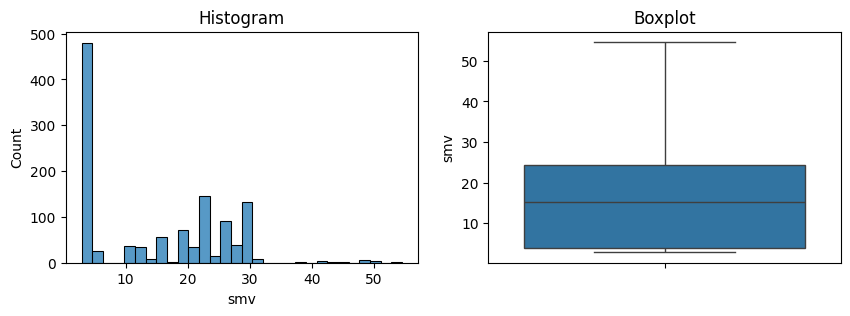

Skewness: 0.40593673685873205
Kurtosis: -0.7953459064328552
--------------------------------------------------------------------------------


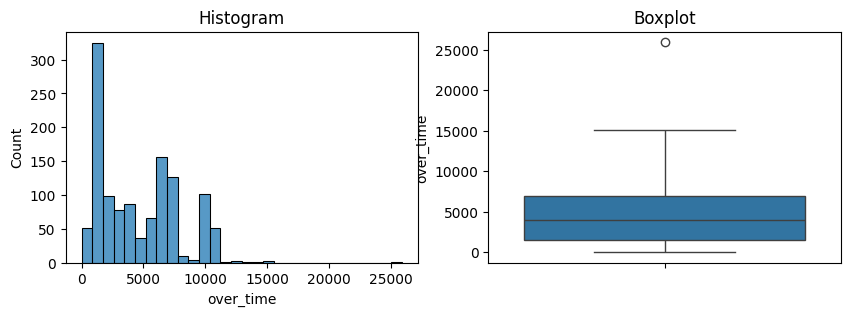

Skewness: 0.6732872952976457
Kurtosis: 0.4243642959188558
--------------------------------------------------------------------------------


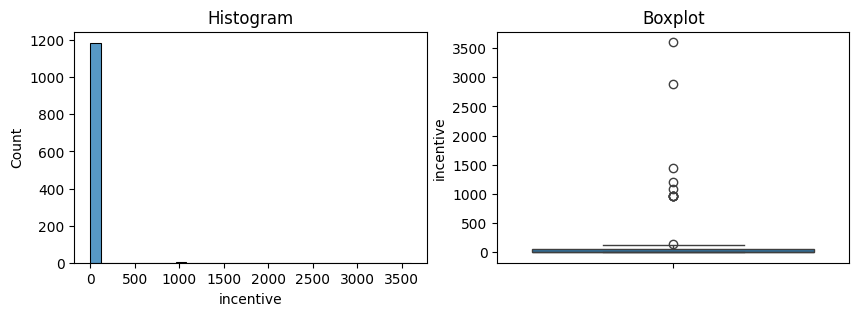

Skewness: 15.790746016958247
Kurtosis: 299.0324620996891
--------------------------------------------------------------------------------


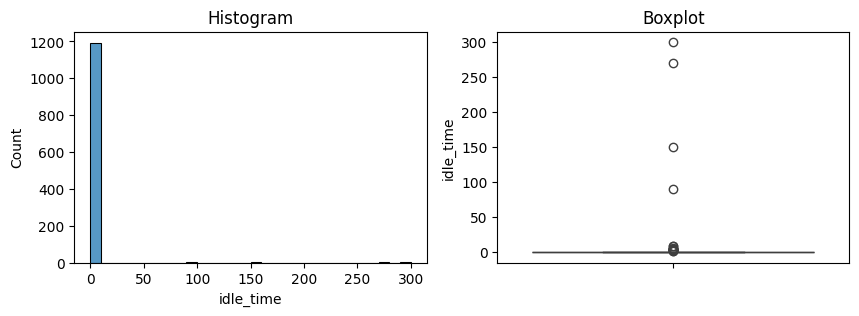

Skewness: 20.545425229670172
Kurtosis: 442.63816033937803
--------------------------------------------------------------------------------


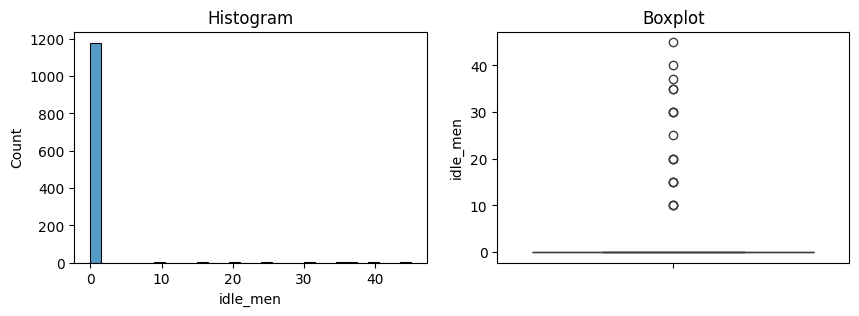

Skewness: 9.855079123524012
Kurtosis: 102.96286931944574
--------------------------------------------------------------------------------


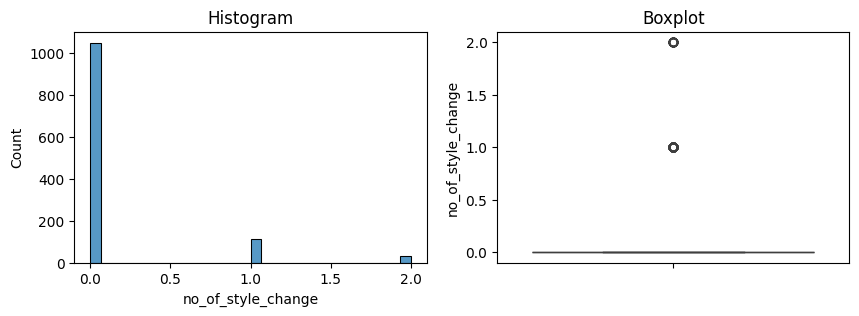

Skewness: 2.9425059460671514
Kurtosis: 8.18149032192787
--------------------------------------------------------------------------------


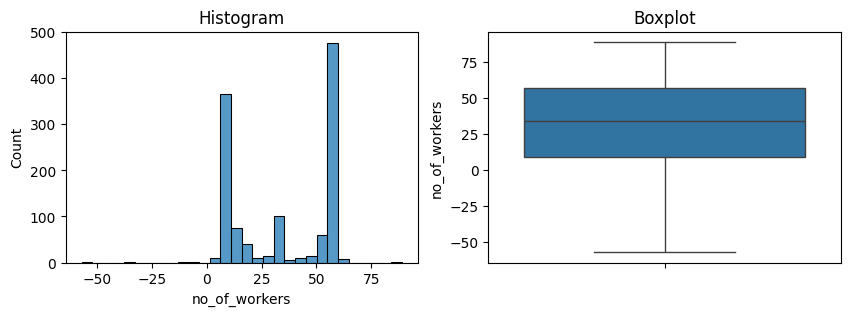

Skewness: -0.21058041534228544
Kurtosis: -1.367593541695826
--------------------------------------------------------------------------------


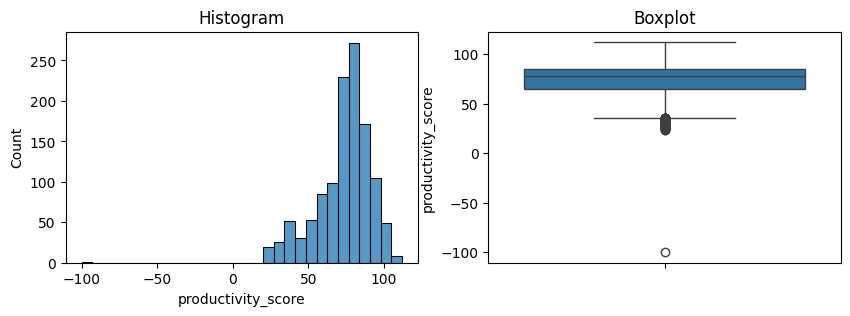

Skewness: -1.4244665308995308
Kurtosis: 6.808535124065298
--------------------------------------------------------------------------------


In [19]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())
        print('-' * 80)

check_distribution_outliers(df[num_cols], num_cols)

##CHECK COLUMNS DISTRIBUTION (CATEGORICAL)

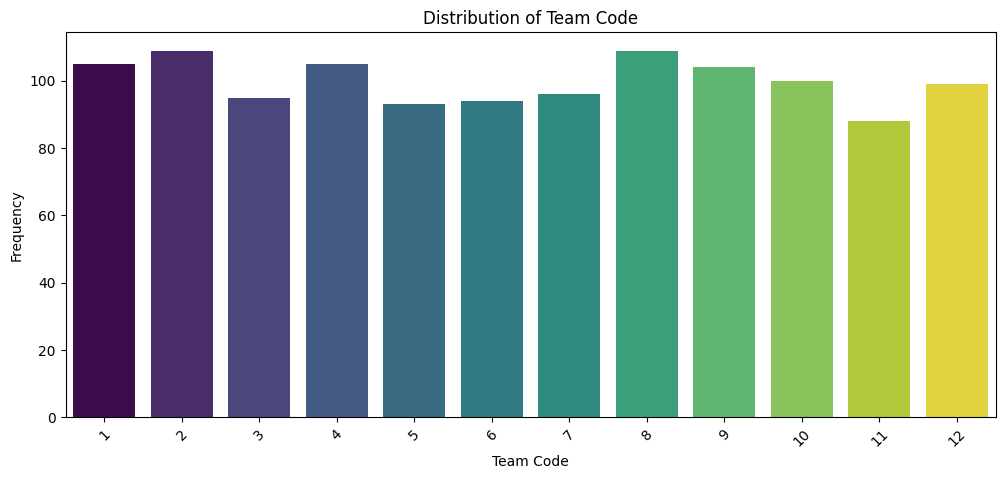

Column: Team Code
Team Code
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64
Unique Categories: 12
--------------------------------------------------------------------------------


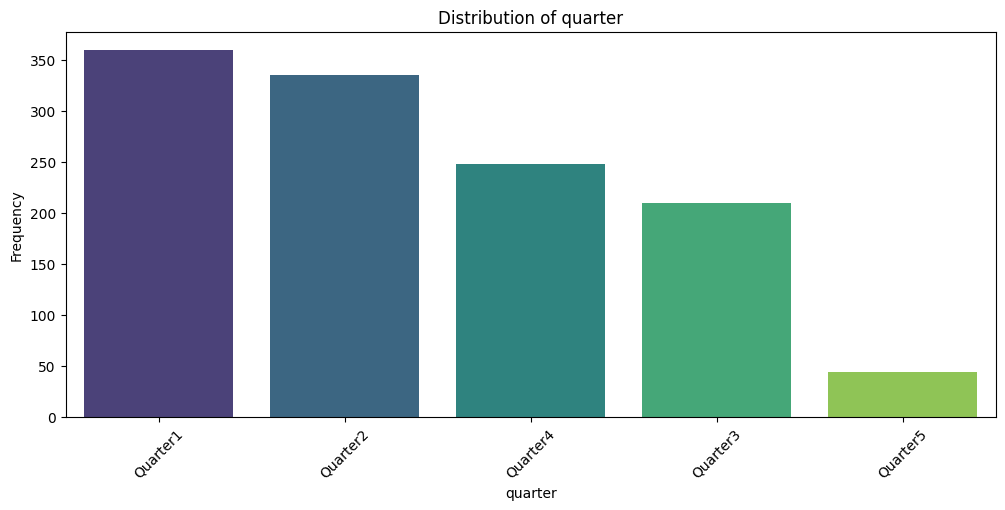

Column: quarter
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
Unique Categories: 5
--------------------------------------------------------------------------------


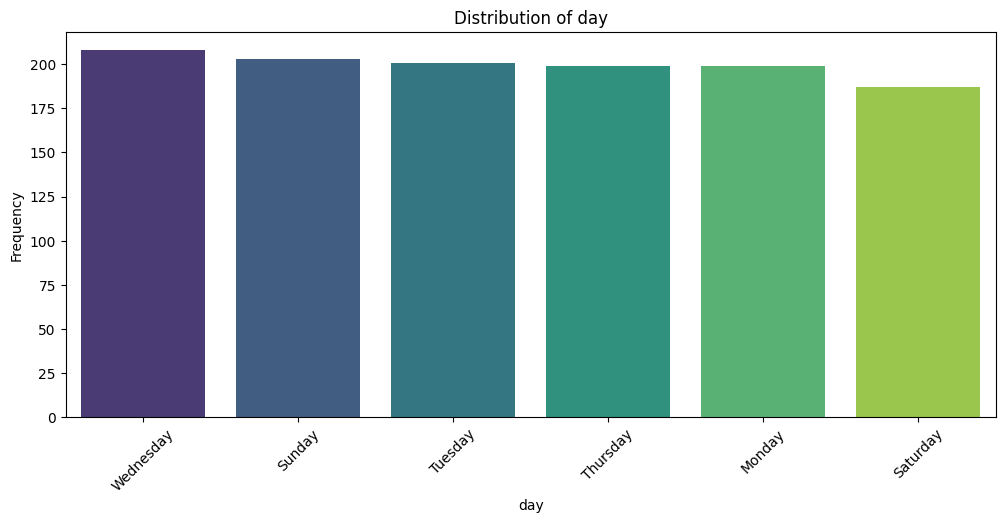

Column: day
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64
Unique Categories: 6
--------------------------------------------------------------------------------


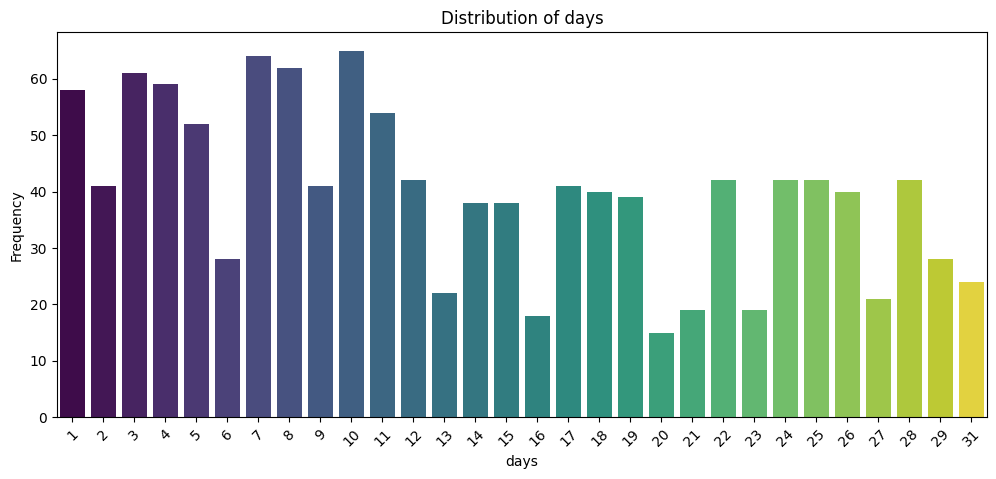

Column: days
days
10    65
7     64
8     62
3     61
4     59
1     58
11    54
5     52
12    42
24    42
28    42
22    42
25    42
17    41
2     41
9     41
26    40
18    40
19    39
15    38
14    38
6     28
29    28
31    24
13    22
27    21
23    19
21    19
16    18
20    15
Name: count, dtype: int64
Unique Categories: 30
--------------------------------------------------------------------------------


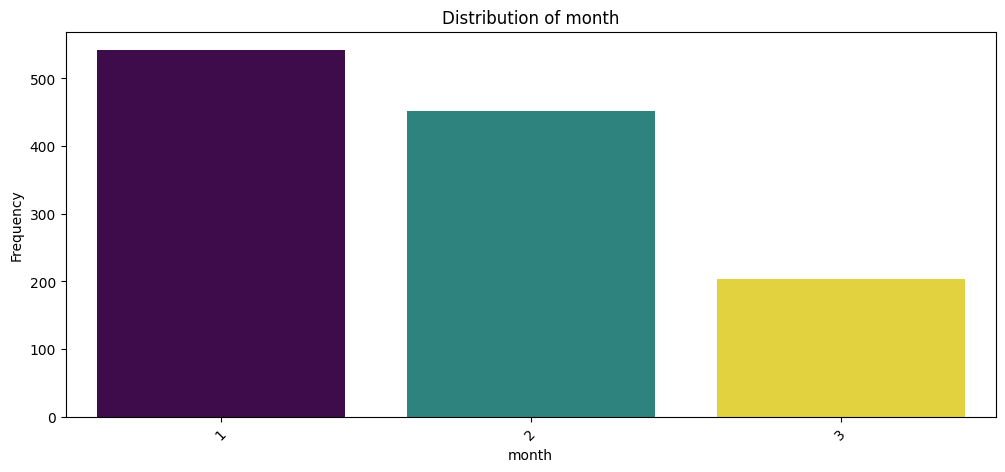

Column: month
month
1    542
2    451
3    204
Name: count, dtype: int64
Unique Categories: 3
--------------------------------------------------------------------------------


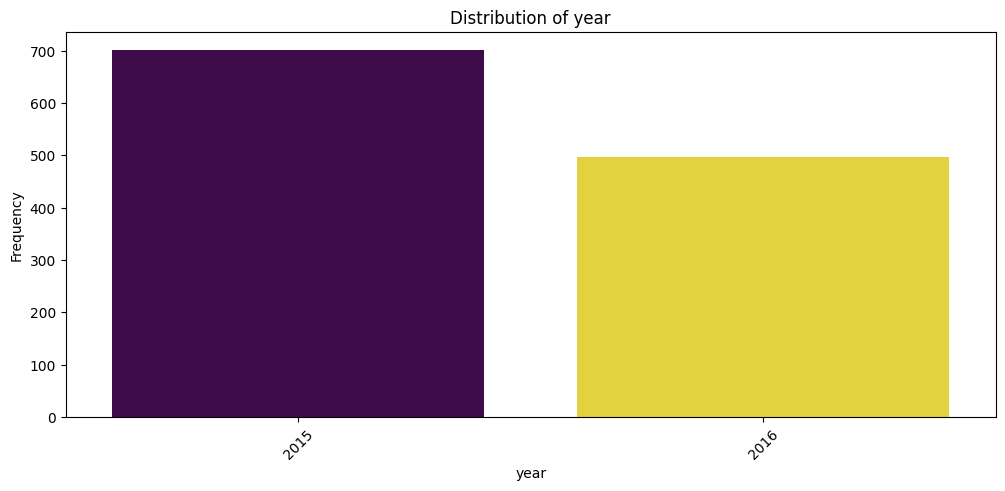

Column: year
year
2015    701
2016    496
Name: count, dtype: int64
Unique Categories: 2
--------------------------------------------------------------------------------


In [20]:
def check_categorical(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 5))

        #Barplot for categorical distribution
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index,
                    y=value_counts.values,
                    hue=value_counts.index,
                    dodge=False,
                    legend=False,
                    palette="viridis")
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()

        # Display additional statistics
        print(f"Column: {col}")
        print(value_counts)
        print(f"Unique Categories: {df[col].nunique()}")
        print('-' * 80)

check_categorical(df, cat_cols)

In [21]:
df = df[df.columns.drop('quarter')]

Drop quarter because invalid (invalid 'Q5' and from the data, the 'month' columns only consist Januari-Maret but there are Q5 on the data)

In [22]:
df.head()

,day,Team Code,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,year,month,days
0,Thursday,8,26.16,7080,98,0.0,0,0,59.0,94.073,2015,1,1
1,Thursday,1,3.94,960,0,0.0,0,0,8.0,88.650,2015,1,1
2,Thursday,11,11.41,3660,50,0.0,0,0,30.5,80.057,2015,1,1
3,Thursday,12,11.41,3660,50,0.0,0,0,30.5,80.057,2015,1,1
4,Thursday,6,25.90,1920,50,0.0,0,0,56.0,80.038,2015,1,1


In [23]:
num_cols = ['year', 'month', 'days', 'Team Code', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'productivity_score']

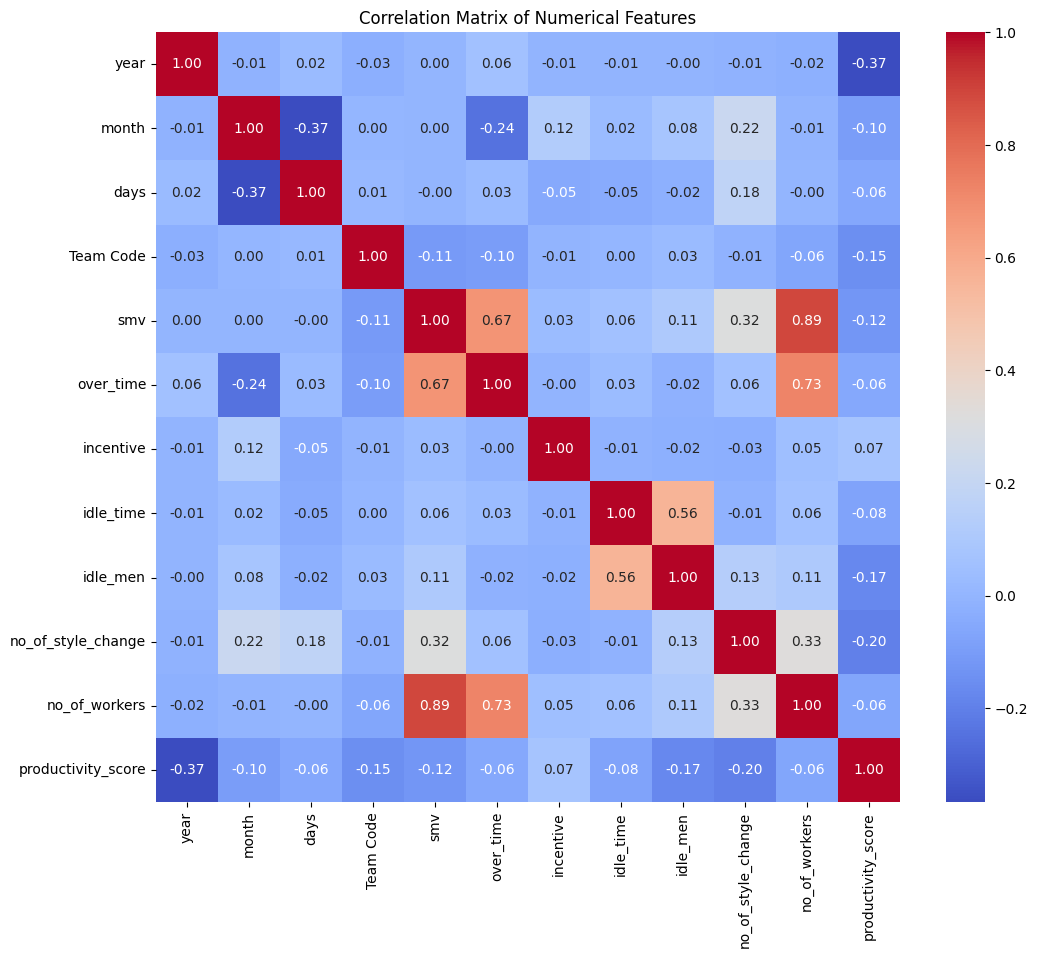

In [24]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Drop 'day', 'month', and 'days' columns because little corelation with the target

In [25]:
df = df[df.columns.drop('days')]
df = df[df.columns.drop('day')]
df = df[df.columns.drop('month')]

#ENCODE

In [26]:
#OHE
df = pd.get_dummies(df, columns = ['Team Code', 'year'], dtype = 'int32')

In [27]:
df.head()

,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score,Team Code_1,Team Code_2,...,Team Code_5,Team Code_6,Team Code_7,Team Code_8,Team Code_9,Team Code_10,Team Code_11,Team Code_12,year_2015,year_2016
0,26.16,7080,98,0.0,0,0,59.0,94.073,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.94,960,0,0.0,0,0,8.0,88.650,1,0,...,0,0,0,0,0,0,0,0,1,0
2,11.41,3660,50,0.0,0,0,30.5,80.057,0,0,...,0,0,0,0,0,0,1,0,1,0
3,11.41,3660,50,0.0,0,0,30.5,80.057,0,0,...,0,0,0,0,0,0,0,1,1,0
4,25.90,1920,50,0.0,0,0,56.0,80.038,0,0,...,0,1,0,0,0,0,0,0,1,0


#SPLITTING

In [28]:
x = df[df.columns.drop('productivity_score')]
y = df['productivity_score']

In [29]:
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

In [30]:
print(x_train.shape,x_test.shape,x_val.shape)

(558, 21) (360, 21) (279, 21)


In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 18 to 1094
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   smv                 558 non-null    float64
 1   over_time           558 non-null    int64  
 2   incentive           558 non-null    int64  
 3   idle_time           558 non-null    float64
 4   idle_men            558 non-null    int64  
 5   no_of_style_change  558 non-null    int64  
 6   no_of_workers       558 non-null    float64
 7   Team Code_1         558 non-null    int32  
 8   Team Code_2         558 non-null    int32  
 9   Team Code_3         558 non-null    int32  
 10  Team Code_4         558 non-null    int32  
 11  Team Code_5         558 non-null    int32  
 12  Team Code_6         558 non-null    int32  
 13  Team Code_7         558 non-null    int32  
 14  Team Code_8         558 non-null    int32  
 15  Team Code_9         558 non-null    int32  
 16  Team Code_1

#SCALE

In [32]:
STD = ['Team Code_1', 'Team Code_2', 'Team Code_3', 'Team Code_4', 'Team Code_5', 'Team Code_6', 'Team Code_7', 'Team Code_8', 'Team Code_9', 'Team Code_10', 'Team Code_11', 'Team Code_12', 'smv', 'no_of_workers', 'year_2015', 'year_2016']
ROBUST = ['over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']

In [33]:
std_scaler = StandardScaler()
x_train[STD] = std_scaler.fit_transform(x_train[STD])
x_test[STD] = std_scaler.transform(x_test[STD])
x_val[STD] = std_scaler.transform(x_val[STD])

In [34]:
rob_scaler = RobustScaler()
x_train[ROBUST] = rob_scaler.fit_transform(x_train[ROBUST])
x_test[ROBUST] = rob_scaler.transform(x_test[ROBUST])
x_val[ROBUST] = rob_scaler.transform(x_val[ROBUST])

##MODEL 1 SEQUENCE

In [ ]:
# Custom R2 metric
def r2_score_keras(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# Custom RMSE metric
def rmse_keras(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Input
input_dim = x_train.shape[1]

# Model
model_seq = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)

])

# Compile
model_seq.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae', rmse_keras, r2_score_keras]
)

# Train
history_seq = model_seq.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - loss: 5567.0913 - mae: 72.3098 - r2_score_keras: -18.7654 - rmse_keras: 74.5418 - val_loss: 5239.0459 - val_mae: 70.2749 - val_r2_score_keras: -19.2927 - val_rmse_keras: 72.4808
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5113.9297 - mae: 69.0017 - r2_score_keras: -17.1036 - rmse_keras: 71.4193 - val_loss: 4643.4360 - val_mae: 65.8789 - val_r2_score_keras: -17.0166 - val_rmse_keras: 68.2462
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4537.8057 - mae: 64.3324 - r2_score_keras: -14.8790 - rmse_keras: 67.1895 - val_loss: 3801.1353 - val_mae: 59.1175 - val_r2_score_keras: -13.7878 - val_rmse_keras: 61.7590
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3864.0154 - mae: 58.0686 - r2_score_keras: -12.5173 - rmse_keras: 61.7697 - val_loss: 2874.8345 - val_mae: 50.6928 - val_r2_score_keras: -10.2205 - val_rmse_keras: 53.7210
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3067.0542 - ma

In [36]:
y_pred_train = model_seq.predict(x_train)
y_pred_val = model_seq.predict(x_val)
y_pred_test = model_seq.predict(x_test)
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)
r2_test = r2_score(y_test, y_pred_test)

print(f"TRAIN R² Score: {r2_train}")
print(f"VAL R² Score: {r2_val}")
print(f"TEST R² Score: {r2_test}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
TRAIN R² Score: 0.5771568382215062
VAL R² Score: 0.2996102091114422
TEST R² Score: 0.21587907303568354


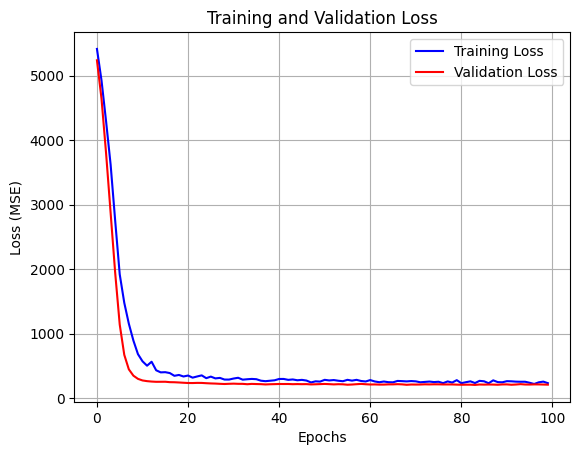

In [37]:
import matplotlib.pyplot as plt

plt.plot(history_seq.history['loss'], label='Training Loss', color='blue')
plt.plot(history_seq.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


##MODEL 1 FUNCTIONAL

In [38]:
# Input dimension
input_dim = x_train.shape[1]

# Functional Model
inputs = Input(shape=(input_dim,))
x = Dense(256, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

model_func = Model(inputs, outputs)

# Compile
model_func.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae', rmse_keras, r2_score_keras]
)

# Train
history_func = model_func.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 5491.1284 - mae: 71.7357 - r2_score_keras: -18.4536 - rmse_keras: 73.9942 - val_loss: 4521.9492 - val_mae: 64.9180 - val_r2_score_keras: -16.5345 - val_rmse_keras: 67.3393
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4587.3296 - mae: 62.0455 - r2_score_keras: -14.5782 - rmse_keras: 66.7046 - val_loss: 2601.4685 - val_mae: 48.0386 - val_r2_score_keras: -9.1317 - val_rmse_keras: 51.0887
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3454.0723 - mae: 46.4907 - r2_score_keras: -10.0364 - rmse_keras: 55.1079 - val_loss: 1112.0477 - val_mae: 30.4914 - val_r2_score_keras: -3.3381 - val_rmse_keras: 33.4174
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2599.7551 - mae: 30.8191 - r2_score_keras: -6.8179 - rmse_keras: 43.1585 - val_loss: 524.1315 - val_mae: 20.0561 - val_r2_score_keras: -1.0273 - val_rmse_keras: 22.9401
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1668.0391 - mae: 23.

In [39]:
y_pred_train2 = model_func.predict(x_train)
y_pred_val2 = model_func.predict(x_val)
y_pred_test2 = model_func.predict(x_test)
r2_train2 = r2_score(y_train, y_pred_train2)
r2_val2 = r2_score(y_val, y_pred_val2)
r2_test2 = r2_score(y_test, y_pred_test2)

print(f"TRAIN R² Score: {r2_train2}")
print(f"VAL R² Score: {r2_val2}")
print(f"TEST R² Score: {r2_test2}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
TRAIN R² Score: 0.6808401751126294
VAL R² Score: 0.3905651716760722
TEST R² Score: 0.30229781121072474


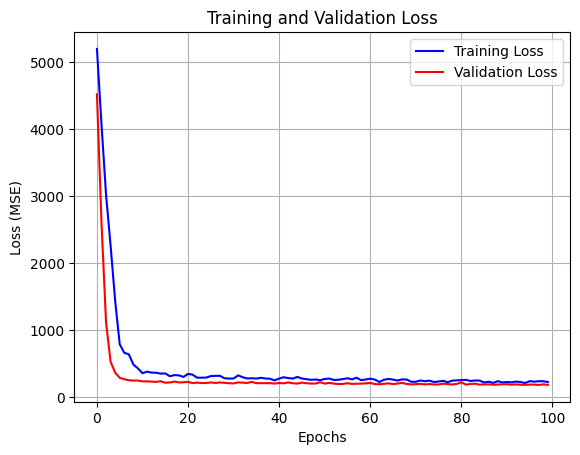

In [40]:
plt.plot(history_func.history['loss'], label='Training Loss', color='blue')
plt.plot(history_func.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

##MODEL 2 SEQUENCE

In [ ]:
# Input
input_dim = x_train.shape[1]

# Model
model_seq2 = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')

])

# Compile
model_seq2.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae', rmse_keras, r2_score_keras]
)

# Train
history_seq2 = model_seq2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 5566.3188 - mae: 72.3074 - r2_score_keras: -18.7502 - rmse_keras: 74.5243 - val_loss: 4966.7202 - val_mae: 68.2863 - val_r2_score_keras: -18.2438 - val_rmse_keras: 70.5678
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4767.5757 - mae: 66.4413 - r2_score_keras: -15.7814 - rmse_keras: 68.9111 - val_loss: 3802.5247 - val_mae: 59.1168 - val_r2_score_keras: -13.7712 - val_rmse_keras: 61.7507
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3879.2532 - mae: 57.7443 - r2_score_keras: -12.2680 - rmse_keras: 61.6755 - val_loss: 2471.9216 - val_mae: 46.7994 - val_r2_score_keras: -8.6373 - val_rmse_keras: 49.7944
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2979.2390 - mae: 46.1711 - r2_score_keras: -8.8475 - rmse_keras: 52.5996 - val_loss: 1401.8413 - val_mae: 34.6206 - val_r2_score_keras: -4.4873 - val_rmse_keras: 37.5050
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2166.7485 - mae: 34.6410 - r2_

In [42]:
y_pred_trains2 = model_seq2.predict(x_train)
y_pred_vals2 = model_seq2.predict(x_val)
y_pred_tests2 = model_seq2.predict(x_test)
r2_train3 = r2_score(y_train, y_pred_trains2)
r2_val3 = r2_score(y_val, y_pred_vals2)
r2_test3 = r2_score(y_test, y_pred_tests2)

print(f"TRAIN R² Score: {r2_train3}")
print(f"VAL R² Score: {r2_val3}")
print(f"TEST R² Score: {r2_test3}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
TRAIN R² Score: 0.6276736482323861
VAL R² Score: 0.3091327924846168
TEST R² Score: 0.2267077216656168


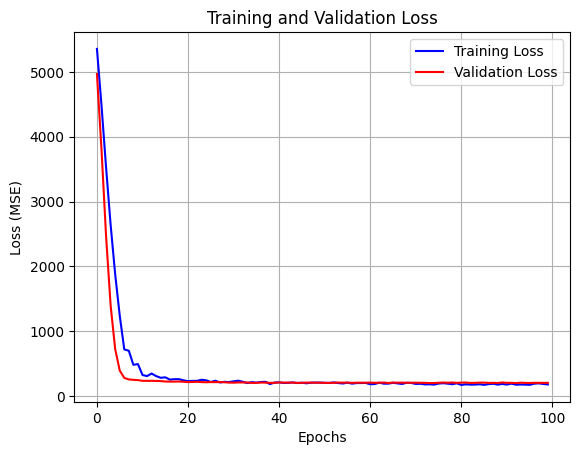

In [43]:
import matplotlib.pyplot as plt

plt.plot(history_seq2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_seq2.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


##MODEL 2 FUNCTIONAL

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Input 
input_dim = x_train.shape[1]

# Functional Model
inputs = Input(shape=(input_dim,))
x = Dense(256, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)

model_func2 = Model(inputs, outputs)

# Compile
model_func2.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae', rmse_keras, r2_score_keras]
)

# Train
history_func2 = model_func2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 5580.2998 - mae: 72.4125 - r2_score_keras: -18.7850 - rmse_keras: 74.6112 - val_loss: 4789.3452 - val_mae: 66.9653 - val_r2_score_keras: -17.5579 - val_rmse_keras: 69.2959
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4554.1958 - mae: 64.0655 - r2_score_keras: -14.8252 - rmse_keras: 67.1576 - val_loss: 2790.8914 - val_mae: 49.9051 - val_r2_score_keras: -9.8534 - val_rmse_keras: 52.8992
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3263.8750 - mae: 47.5401 - r2_score_keras: -10.1225 - rmse_keras: 55.0582 - val_loss: 1214.4191 - val_mae: 31.8763 - val_r2_score_keras: -3.7315 - val_rmse_keras: 34.8982
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2114.6077 - mae: 31.7275 - r2_score_keras: -5.5174 - rmse_keras: 41.3467 - val_loss: 533.9575 - val_mae: 20.2200 - val_r2_score_keras: -1.0616 - val_rmse_keras: 23.1454
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 808.3720 - mae: 20.61

In [45]:
y_pred_train3 = model_func2.predict(x_train)
y_pred_val3 = model_func2.predict(x_val)
y_pred_test3 = model_func2.predict(x_test)
r2_train4 = r2_score(y_train, y_pred_train3)
r2_val4 = r2_score(y_val, y_pred_val3)
r2_test4 = r2_score(y_test, y_pred_test3)

print(f"TRAIN R² Score: {r2_train4}")
print(f"VAL R² Score: {r2_val4}")
print(f"TEST R² Score: {r2_test4}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
TRAIN R² Score: 0.7189188885253055
VAL R² Score: 0.40374420196877425
TEST R² Score: 0.30888378245184345


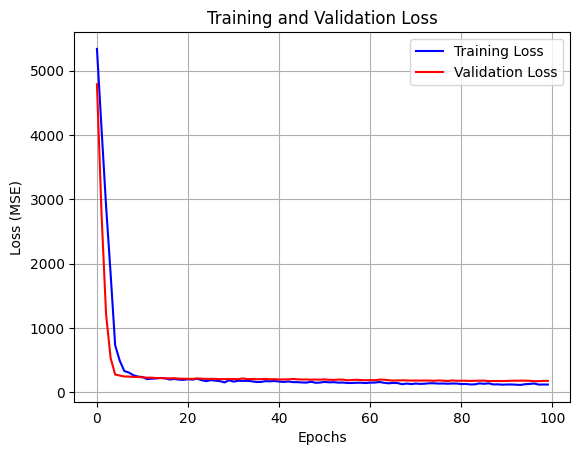

In [46]:
plt.plot(history_func2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_func2.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

#1D

In [47]:
# Model 1
mae_test1 = mean_absolute_error(y_test, y_pred_test)
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test1 = r2_score(y_test, y_pred_test)

# Model 2
mae_test2 = mean_absolute_error(y_test, y_pred_test2)
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_pred_test2))
r2_test2 = r2_score(y_test, y_pred_test2)

# Model 3
mae_test3 = mean_absolute_error(y_test, y_pred_tests2)
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_pred_tests2))
r2_test3 = r2_score(y_test, y_pred_tests2)

# Model 4
mae_test4 = mean_absolute_error(y_test, y_pred_test3)
rmse_test4 = np.sqrt(mean_squared_error(y_test, y_pred_test3))
r2_test4 = r2_score(y_test, y_pred_test3)


In [48]:
# Model 1 (train)
mae_train1 = mean_absolute_error(y_train, y_pred_train)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train1 = r2_score(y_train, y_pred_train)

# Model 2 (train)
mae_train2 = mean_absolute_error(y_train, y_pred_train2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_pred_train2))
r2_train2 = r2_score(y_train, y_pred_train2)

# Model 3 (train)
mae_train3 = mean_absolute_error(y_train, y_pred_trains2)
rmse_train3 = np.sqrt(mean_squared_error(y_train, y_pred_trains2))
r2_train3 = r2_score(y_train, y_pred_trains2)

# Model 4 (train)
mae_train4 = mean_absolute_error(y_train, y_pred_train3)
rmse_train4 = np.sqrt(mean_squared_error(y_train, y_pred_train3))
r2_train4 = r2_score(y_train, y_pred_train3)

In [49]:
train_results = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "MAE (Train)": [mae_train1, mae_train2, mae_train3, mae_train4],
    "RMSE (Train)": [rmse_train1, rmse_train2, rmse_train3, rmse_train4],
    "R² (Train)": [r2_train1, r2_train2, r2_train3, r2_train4]
})

print(train_results)

     Model  MAE (Train)  RMSE (Train)  R² (Train)
0  Model 1     8.894486     11.464506    0.577157
1  Model 2     7.531727      9.960240    0.680840
2  Model 3     8.217739     10.757901    0.627674
3  Model 4     6.875065      9.347199    0.718919


In [50]:
results = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "MAE (Test)": [mae_test1, mae_test2, mae_test3, mae_test4],
    "RMSE (Test)": [rmse_test1, rmse_test2, rmse_test3, rmse_test4],
    "R² (Test)": [r2_test1, r2_test2, r2_test3, r2_test4]
})

print(results)

     Model  MAE (Test)  RMSE (Test)  R² (Test)
0  Model 1   11.662508    17.317016   0.215879
1  Model 2   10.511118    16.334904   0.302298
2  Model 3   11.357950    17.197027   0.226708
3  Model 4   10.189374    16.257624   0.308884


From the evaluation results of the four models that were created, we can see that Model 4 performs the best compared to the others. This assessment is based on three metrics: MAE, RMSE, and R². MAE indicates the average prediction error (the smaller the value, the more accurate the model). In this case, Model 4 has the lowest MAE, meaning its predictions are the closest to the actual values. Next is RMSE, which also measures error but is more sensitive to large errors. Model 4 has the smallest RMSE value, indicating that the model is quite stable and does not deviate much in extreme cases. Finally, R² measures how well the model explains the data. Model 4 has the highest R² value, meaning it captures the data patterns most effectively. Therefore, overall, it can be concluded that Model 4 is the most accurate, stable, and reliable among all the models.